In [1]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
import os
import numpy as np
from skimage.io import imread, imshow
from skimage.transform import resize
import random
import matplotlib.pyplot as plt

2023-09-20 20:31:19.346605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Set image dimensions
IMG_WIDTH = 512
IMG_HEIGHT = 256
IMG_CHANNELS = 3  # RGB images have 3 channels

In [3]:
# Data paths
TRAIN_DATA_PATH = './data/resized/resized_images/training'  # Update with your path
TEST_DATA_PATH = './data/resized/resized_images/test'  # Update with your path
MASK_PATH = './data/resized/segmentation_maps/'  # Update with your path

In [4]:
# Set random seed for reproducibility
seed = 42
random.seed = seed
np.random.seed = seed

In [20]:
# Get a list of image filenames for training and test
train_image_ids = next(os.walk(TRAIN_DATA_PATH))[2]
test_image_ids = next(os.walk(TEST_DATA_PATH))[2]

In [21]:
train_image_ids

['965-k-32-4748ilk.png',
 '939-k-20-4748ilk.png',
 '447-k-25-4748ilk.png',
 '933-e-66-3738ilk.png',
 '934-k-21-4748ilk.png',
 '863-e-23-3738ilk.png',
 '946-k-16-3738ilk.png',
 '886-k-23-4748ilk.png',
 '838-e-23-3738ilk.png',
 '410-k-25-3738ilk.png',
 '446-e-34-3738ilk.png',
 '811-e-28-3738ilk.png',
 '948-e-37-3738ilk.png',
 '433-k-21-3738ilk.png',
 '961-k-25-3738ilk.png',
 '919-e-48-3738ilk.png',
 '917-k-22-3738ilk.png',
 '929-k-22-3738ilk.png',
 '846-k-23-3738ilk.png',
 '904-k-39-3738ilk.png',
 '925-k-25-3738ilk.png',
 '957-e-19-3738ilk.png',
 '442-e-23-4748ilk.png',
 '969-e-30-4748ilk.png',
 '914-e-39-3738ilk.png',
 '830-k-24-3738ilk.png',
 '454-k-19-4748ilk.png',
 '837-e-24-4748ilk.png',
 '892-k-26-4748ilk.png',
 '966-k-32-3738ilk.png',
 '921-k-22-4748ilk.png',
 '443-k-19-3738ilk.png',
 '396-k-20-4748ilk.png',
 '903-e-25-4748ilk.png',
 '976-e-29-4748ilk.png',
 '937-k-21-3738ilk.png',
 '469-e-32-3738ilk.png',
 '851-e-34-3738ilk.png',
 '913-k-22-3738ilk.png',
 '775-k-37-4748ilk.png',


In [22]:
test_image_ids

['156-k-29-4748ilk.png',
 '122-e-26-4748ilk.png',
 '341-e-52-3738ilk.png',
 '165-K-48-4748ilk.png',
 '133-e-45-4748ilk.png',
 '377-e-52-4748ilk.png',
 '366-k-31-4748ilk.png',
 '9-e-30-3738ilk.png',
 '379-k-31-4748ilk.png',
 '111-K-48-4748ilk.png',
 '160-K-4748ilk.png',
 '17-k-27-4748ilk.png',
 '90-K-4748ilk.png',
 '370-e-24-4748ilk.png',
 '162-K-4748ilk.png',
 '77-K-4748ilk.png',
 '358-k-20-4748ilk.png',
 '160-K-3738ilk.png',
 '379-k-31-3738ilk.png',
 '133-e-45-3738ilk.png',
 '377-e-52-3738ilk.png',
 '385-e-29-4748ilk.png',
 '122-e-26-3738ilk.png',
 '341-e-52-4748ilk.png',
 '374-k-45-3738ilk.png',
 '156-k-29-3738ilk.png']

In [23]:
# Initialize arrays to store training and test images and masks
X_train = []
Y_train = []
X_test = []
Y_test = []

In [24]:

# Load training images and masks
print('Loading training images and masks')
for n, image_filename in enumerate(train_image_ids):
    try:
        # Load the image
        img = imread(os.path.join(TRAIN_DATA_PATH, image_filename))
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_train.append(img)

        # Load the corresponding segmentation map
        mask_filename = os.path.splitext(image_filename)[0] + ".png"
        mask = imread(os.path.join(MASK_PATH, mask_filename))
        mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        mask = np.expand_dims(mask, axis=-1)
        Y_train.append(mask)
    except Exception as e:
        print(f"Error processing {image_filename}: {e}")


Loading training images and masks


In [25]:
# Load test images and masks
print('Loading test images and masks')
for n, image_filename in enumerate(test_image_ids):
    try:
        # Load the image
        img = imread(os.path.join(TEST_DATA_PATH, image_filename))
        img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        X_test.append(img)

        # Load the corresponding segmentation map
        mask_filename = os.path.splitext(image_filename)[0] + ".png"
        mask = imread(os.path.join(MASK_PATH, mask_filename))
        mask = resize(mask, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        mask = np.expand_dims(mask, axis=-1)
        Y_test.append(mask)
    except Exception as e:
        print(f"Error processing {image_filename}: {e}")


Loading test images and masks


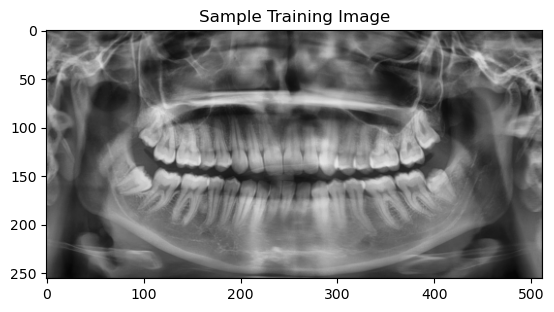

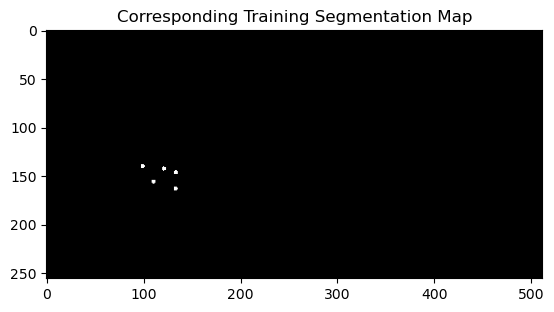

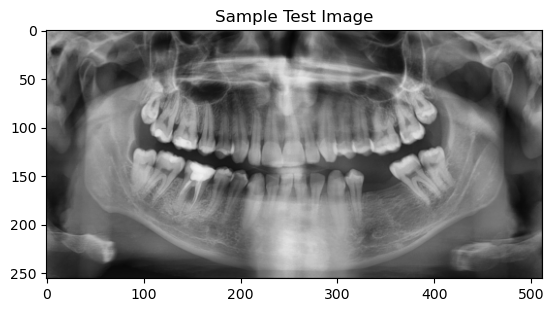

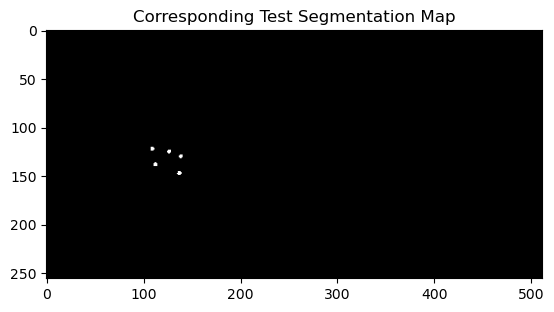

In [26]:
# Check if there are valid training and test images and masks
if len(X_train) > 0 and len(Y_train) > 0 and len(X_test) > 0 and len(Y_test) > 0:
    # Convert the lists to numpy arrays
    X_train = np.array(X_train, dtype=np.uint8)
    Y_train = np.array(Y_train, dtype=bool)
    X_test = np.array(X_test, dtype=np.uint8)
    Y_test = np.array(Y_test, dtype=bool)

    # Display a sample training image and mask
    image_x_train = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[image_x_train])
    plt.title('Sample Training Image')
    plt.show()

    plt.imshow(np.squeeze(Y_train[image_x_train]), cmap='gray')
    plt.title('Corresponding Training Segmentation Map')
    plt.show()

    # Display a sample test image and mask
    image_x_test = random.randint(0, len(X_test) - 1)
    plt.imshow(X_test[image_x_test])
    plt.title('Sample Test Image')
    plt.show()

    plt.imshow(np.squeeze(Y_test[image_x_test]), cmap='gray')
    plt.title('Corresponding Test Segmentation Map')
    plt.show()
else:
    print("No valid training and test images and masks found.")

In [27]:
# Split the training data into training and validation sets (you can customize this)
split_ratio = 0.8
split_index = int(len(X_train) * split_ratio)

x_train = X_train[:split_index]
y_train = Y_train[:split_index]
x_val = X_train[split_index:]
y_val = Y_train[split_index:]

In [28]:
# Get lengths and other details
num_total_samples = len(X_train) + len(X_test)
num_training_samples = len(x_train)
num_validation_samples = len(x_val)
num_test_samples = len(X_test)
input_shape = x_train.shape[1:]  # Shape of a single input sample
output_shape = y_train.shape[1:]  # Shape of a single output sample

print("Total number of samples:", num_total_samples)
print("Number of training samples:", num_training_samples)
print("Number of validation samples:", num_validation_samples)
print("Number of test samples:", num_test_samples)
print("Input shape:", input_shape)
print("Output shape:", output_shape)

Total number of samples: 229
Number of training samples: 162
Number of validation samples: 41
Number of test samples: 26
Input shape: (256, 512, 3)
Output shape: (256, 512, 1)


In [30]:
# Build the U-Net model
inputs = tf.keras.layers.Input(input_shape)
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [31]:

# Contracting path (Encoder)
c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(1024, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

# Expansive path (Decoder)
u6 = tf.keras.layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4], axis=3)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

u7 = tf.keras.layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3], axis=3)
c7 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

u8 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2], axis=3)
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

u9 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

model.summary()

2023-09-20 21:12:10.686276: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 256, 512, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 512, 64  1792        ['lambda_2[0][0]']               
                                )                                                                 
                                                                                              

                                                                                                  
 conv2d_13 (Conv2D)             (None, 64, 128, 256  590080      ['dropout_6[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_2 (Conv2DTran  (None, 128, 256, 12  131200     ['conv2d_13[0][0]']              
 spose)                         8)                                                                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 128, 256, 25  0           ['conv2d_transpose_2[0][0]',     
                                6)                                'conv2d_3[0][0]']               
                                                                                                  
 conv2d_14

In [32]:
# Compile the model with your chosen optimizer and loss function
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model
epochs = 1  # Adjust the number of epochs as needed
batch_size = 8  # Adjust the batch size as needed

In [38]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

21/21 [==============================] - 846s 41s/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.0072 - val_accuracy: 0.9995


In [39]:

# Evaluate the model on the test data (optional)
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')



1/1 [==============================] - 13s 13s/step - loss: 0.0069 - accuracy: 0.9995
Test Loss: 0.0069, Test Accuracy: 0.9995


In [40]:
# Make predictions on the test data (optional)
preds = model.predict(X_test)

# Save the trained model (optional)
model.save('unet_model.h5')


1/1 [==============================] - 14s 14s/step


In [41]:
# Visualize training history (optional)
training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

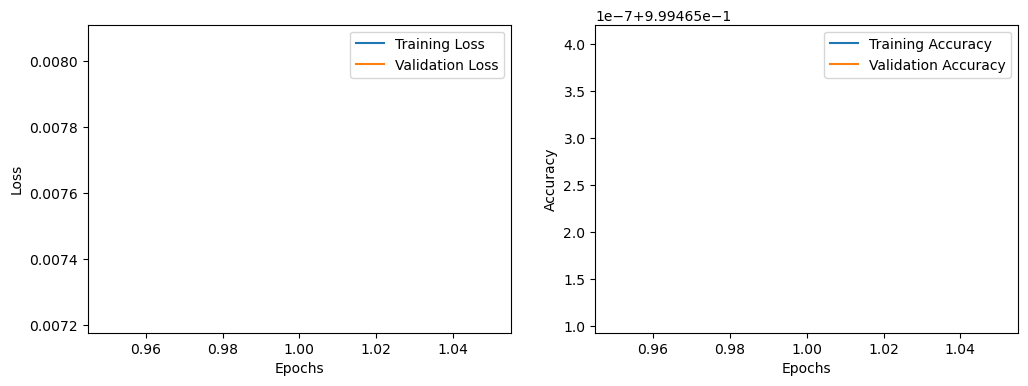

In [42]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), training_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [43]:
def plot_coordinates(csv_file, image_dir, num_images=5):
    """
    Randomly selects and plots coordinates from a CSV file on images.

    Parameters:
        csv_file (str): Path to the CSV file containing coordinates.
        image_dir (str): Path to the folder containing images.
        num_images (int): Number of images to randomly select and plot.

    Returns:
        List of image filenames with plotted coordinates.
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Randomly select 'num_images' images
    selected_image_filenames = random.sample(df['IMAGE'].tolist(), num_images)

    # Initialize a list to store image filenames with plotted coordinates
    images_with_coordinates = []

    for image_filename in selected_image_filenames:
        # Find the corresponding row in the CSV file
        row = df[df['IMAGE'] == image_filename]

        if not row.empty:
            # Extract image name and coordinates
            image_name = image_filename + '.jpg'  # Assuming image files have '.jpg' extension
            image_path = os.path.join(image_dir, image_name)
            x_coordinates = [row[f'{i}-X'].values[0] for i in range(1, 6)]
            y_coordinates = [row[f'{i}-Y'].values[0] for i in range(1, 6)]

            # Read the image
            img = cv2.imread(image_path)

            # Draw points on the image for each set of coordinates
            for i, (x, y) in enumerate(zip(x_coordinates, y_coordinates), 1):
                # Generate a unique color for each point
                color = tuple(np.random.randint(0, 256, 3).tolist())

                # Increase the size of the dot
                cv2.circle(img, (int(x), int(y)), 5, color, -1)

                # Label the point with a number
                cv2.putText(img, str(i), (int(x) - 10, int(y) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

            # Display the image with points using matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_rgb)
            plt.title(f"Image with Points: {image_name}")
            plt.axis('off')
            plt.show()

            # Add the image filename to the list
            images_with_coordinates.append(image_name)

    return images_with_coordinates

In [49]:

# Get a list of test image filenames
test_image_filenames = os.listdir(TEST_DATA_PATH)

# Initialize a list to store image filenames with plotted coordinates
images_with_coordinates = []


In [52]:
# Define the path to the directory containing test images
test_image_dir = './data/resized/resized_images/test/'

# Get a list of test image filenames
test_image_filenames = os.listdir(test_image_dir)

# Initialize a list to store image filenames with plotted coordinates
images_with_coordinates = []


In [53]:
test_image_filenames

['156-k-29-4748ilk.png',
 '122-e-26-4748ilk.png',
 '341-e-52-3738ilk.png',
 '165-K-48-4748ilk.png',
 '133-e-45-4748ilk.png',
 '377-e-52-4748ilk.png',
 '366-k-31-4748ilk.png',
 '9-e-30-3738ilk.png',
 '379-k-31-4748ilk.png',
 '111-K-48-4748ilk.png',
 '160-K-4748ilk.png',
 '17-k-27-4748ilk.png',
 '90-K-4748ilk.png',
 '370-e-24-4748ilk.png',
 '162-K-4748ilk.png',
 '77-K-4748ilk.png',
 '358-k-20-4748ilk.png',
 '160-K-3738ilk.png',
 '379-k-31-3738ilk.png',
 '133-e-45-3738ilk.png',
 '377-e-52-3738ilk.png',
 '385-e-29-4748ilk.png',
 '122-e-26-3738ilk.png',
 '341-e-52-4748ilk.png',
 '374-k-45-3738ilk.png',
 '156-k-29-3738ilk.png']

1/1 [==============================] - 1s 743ms/step
Count of points: 131072


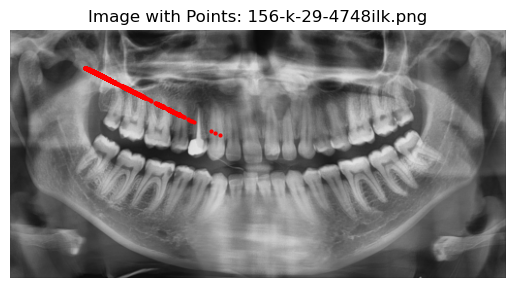

1/1 [==============================] - 1s 611ms/step
Count of points: 131072


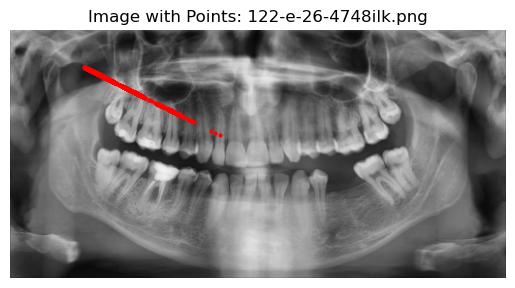

1/1 [==============================] - 1s 600ms/step
Count of points: 131072


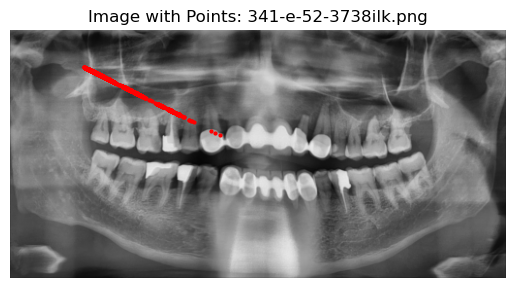

1/1 [==============================] - 1s 610ms/step
Count of points: 131072


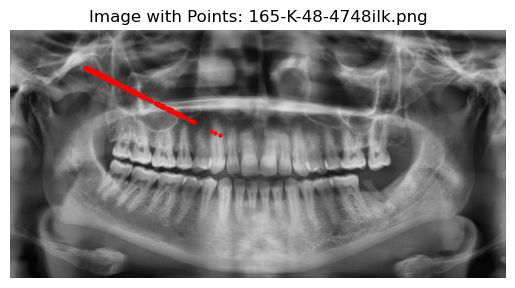

1/1 [==============================] - 1s 640ms/step
Count of points: 131072


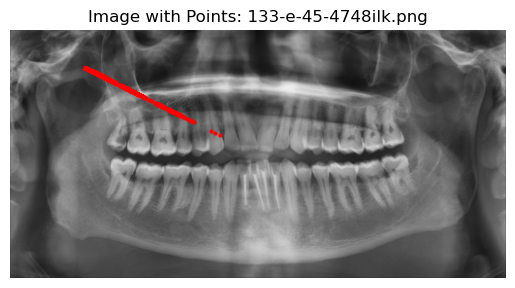

1/1 [==============================] - 1s 644ms/step
Count of points: 131072


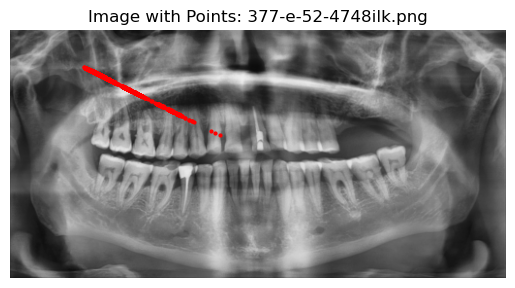

1/1 [==============================] - 1s 717ms/step
Count of points: 131072


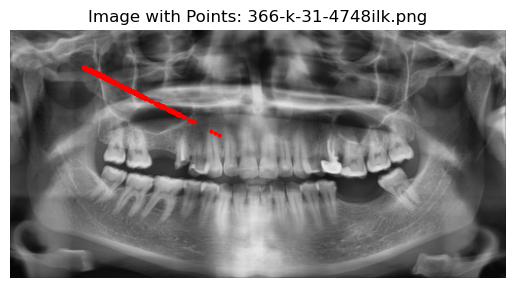

1/1 [==============================] - 1s 617ms/step
Count of points: 131072


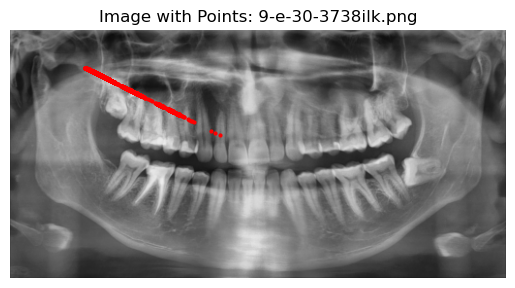

1/1 [==============================] - 1s 658ms/step
Count of points: 131072


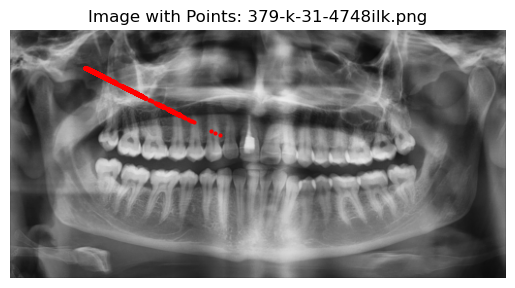

1/1 [==============================] - 1s 603ms/step
Count of points: 131072


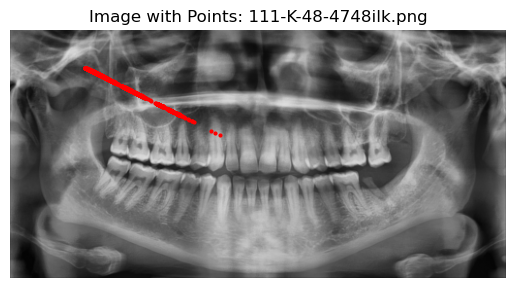

1/1 [==============================] - 1s 587ms/step
Count of points: 131072


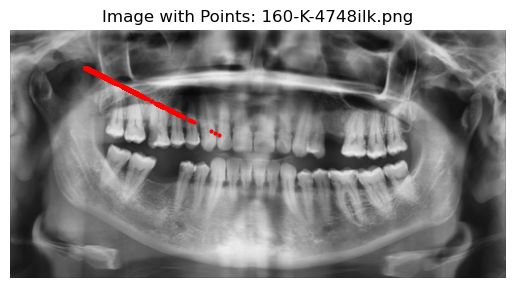

1/1 [==============================] - 1s 597ms/step
Count of points: 131072


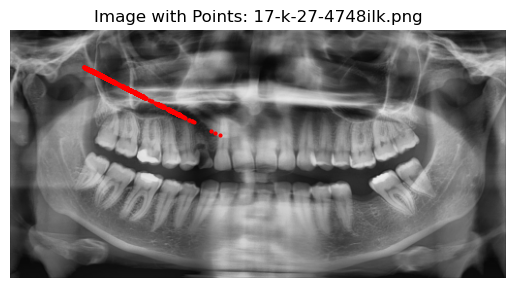

1/1 [==============================] - 1s 638ms/step
Count of points: 131072


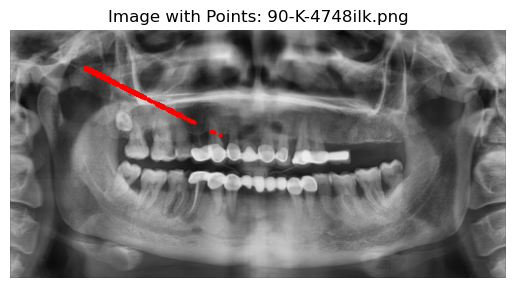

1/1 [==============================] - 1s 664ms/step
Count of points: 131072


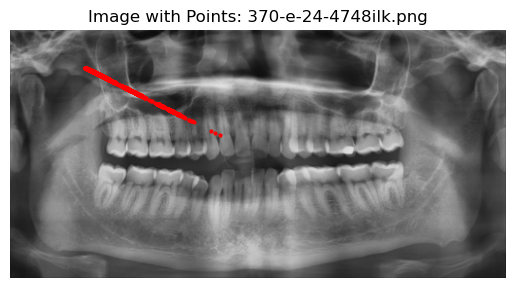

1/1 [==============================] - 1s 710ms/step
Count of points: 131072


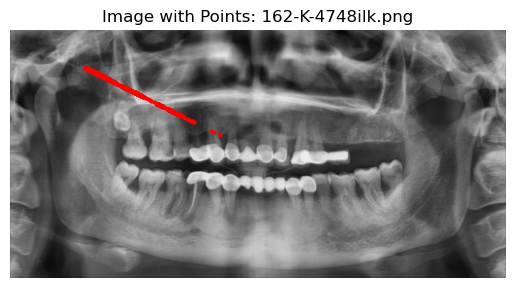

1/1 [==============================] - 1s 625ms/step
Count of points: 131072


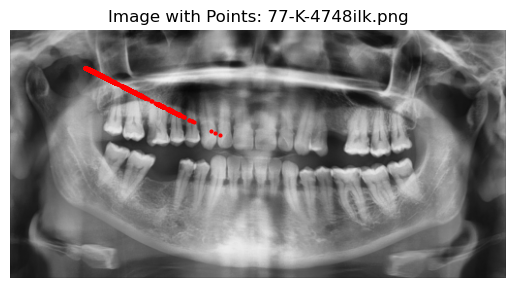

1/1 [==============================] - 1s 652ms/step
Count of points: 131072


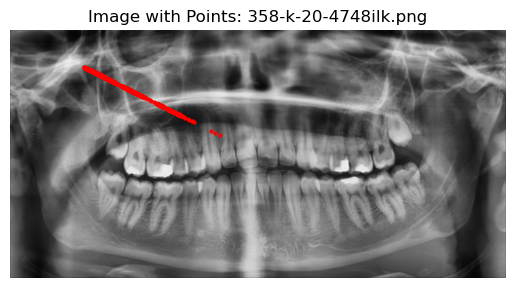

1/1 [==============================] - 1s 618ms/step
Count of points: 131072


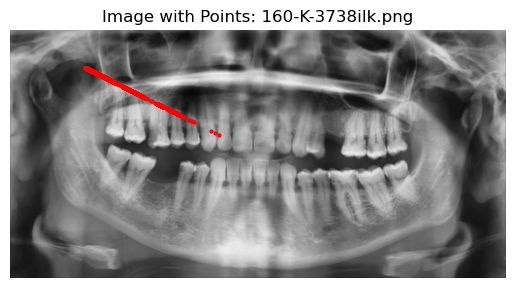

1/1 [==============================] - 1s 617ms/step
Count of points: 131072


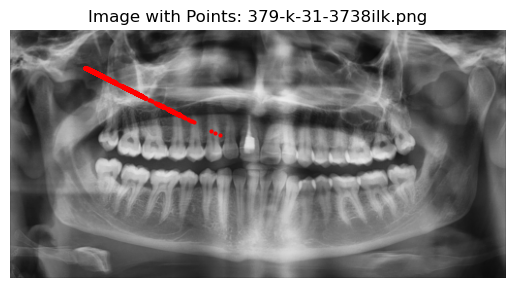

1/1 [==============================] - 1s 604ms/step
Count of points: 131072


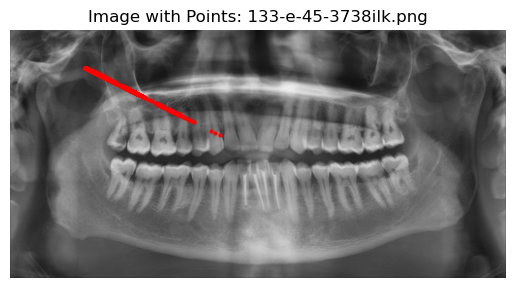

1/1 [==============================] - 1s 637ms/step
Count of points: 131072


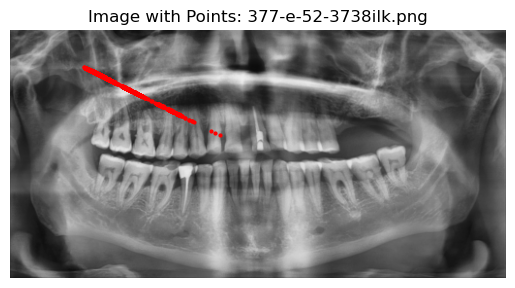

1/1 [==============================] - 1s 627ms/step
Count of points: 131072


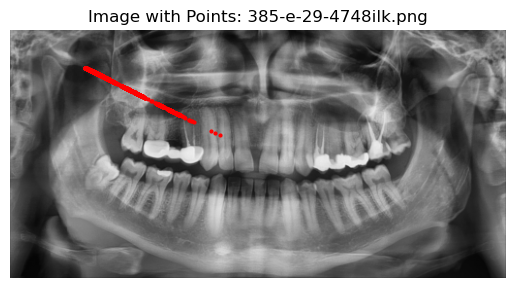

1/1 [==============================] - 1s 730ms/step
Count of points: 131072


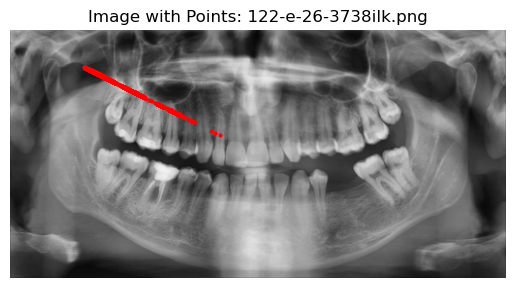

1/1 [==============================] - 1s 644ms/step
Count of points: 131072


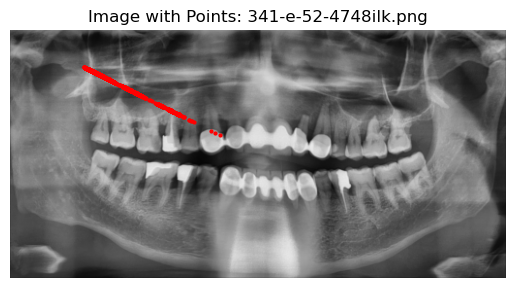

1/1 [==============================] - 1s 766ms/step
Count of points: 131072


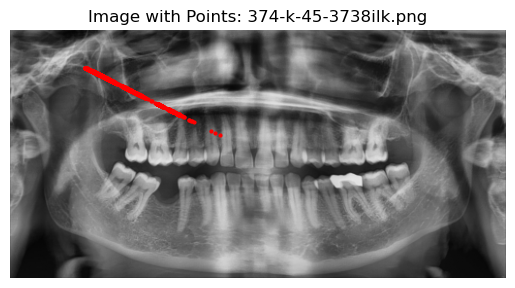

1/1 [==============================] - 1s 652ms/step
Count of points: 131072


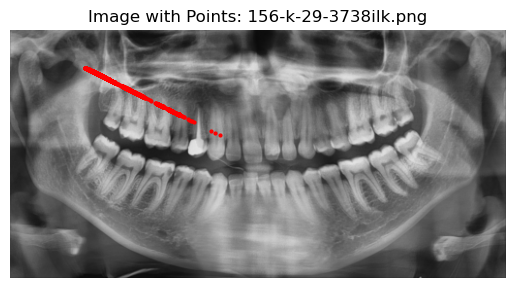

Images with Plotted Coordinates:
156-k-29-4748ilk.png
122-e-26-4748ilk.png
341-e-52-3738ilk.png
165-K-48-4748ilk.png
133-e-45-4748ilk.png
377-e-52-4748ilk.png
366-k-31-4748ilk.png
9-e-30-3738ilk.png
379-k-31-4748ilk.png
111-K-48-4748ilk.png
160-K-4748ilk.png
17-k-27-4748ilk.png
90-K-4748ilk.png
370-e-24-4748ilk.png
162-K-4748ilk.png
77-K-4748ilk.png
358-k-20-4748ilk.png
160-K-3738ilk.png
379-k-31-3738ilk.png
133-e-45-3738ilk.png
377-e-52-3738ilk.png
385-e-29-4748ilk.png
122-e-26-3738ilk.png
341-e-52-4748ilk.png
374-k-45-3738ilk.png
156-k-29-3738ilk.png


In [62]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('unet_model.h5')  # Replace with the actual path to your trained model

# Define the path to the directory containing test images
test_image_dir = './data/resized/resized_images/test/'

# Get a list of test image filenames
test_image_filenames = os.listdir(test_image_dir)

# Initialize a list to store image filenames with plotted coordinates
images_with_coordinates = []

# Iterate through test images
for image_filename in test_image_filenames:
    # Load and preprocess the test image
    img_path = os.path.join(test_image_dir, image_filename)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize the image

    # Expand dimensions to match the model's input shape
    img = np.expand_dims(img, axis=0)

    # Use the trained model to predict coordinates
    coordinates = model.predict(img)

    # Extract x and y coordinates from the single channel
    coordinates = coordinates[0, :, :, 0]
    
    # Assuming coordinates is your 2D numpy array
    count_points = np.count_nonzero(coordinates)

    print("Count of points:", count_points)

    # Split the coordinates into x and y
    x_coordinates = coordinates * img.shape[2]  # Scale to image dimensions
    y_coordinates = coordinates * img.shape[1]

    # Plot the points on the image
    plt.imshow(img[0])
    plt.scatter(x_coordinates, y_coordinates, c='red', s=4)  # Red points for visualization
    plt.title(f"Image with Points: {image_filename}")
    plt.axis('off')
    plt.show()

    # Add the image filename to the list
    images_with_coordinates.append(image_filename)

# Print the list of image filenames with plotted coordinates
print("Images with Plotted Coordinates:")
for image_name in images_with_coordinates:
    print(image_name)
